# For (a) (i), how many N do we need to look at (can I do N_list=(8,16,32...2048)?)
# For (a) (ii), am I supposed to use the practical error calculation (or can I use the real value given by scipy.special.dawsn) for each of the three methods?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy.special import dawsn
import gaussxw as gsx

In [17]:
#PART (a) i.

#Evaluating the dawson function using the trapezoid rule:

#Using trapezoid rule code from Lecture 2 notes:

#Define the integrand in the integral in the dawson function:
def f(x): 
    return np.e**(x**2)

a = 0.0 # beginning of interval
b = 4.0 # end of interval

#Output lists for the trapezoid rule, Simpson's rule, and gaussian quadrature integration for each N
trap_list = []
simp_list = []
quad_list = []

N_list = []

for n in range(2,13):
    N = 2**n #N goes from 4 to 4096, by doubling each time
    #the outputted results only show 8<=N=2048, but N=4,4096 are needed to practically calculate errors in part (ii)
    h = (b-a)/N # width of slice
    N_list.append(N)
    
    #________Trapezoid rule:________
    s = 0.5*f(a) + 0.5*f(b) # the end bits

    for k in range(1,N): # adding the interior bits
        s += f(a+k*h) 

    trap_I = h*s 
    trap_D = np.e**(-b**2) * trap_I
    trap_list.append(trap_D)

    #______Simpson's rule:______

    s = f(a) + f(b) # the end bits

    for k in range(1,N,2): # adding the odd terms
        s += 4*f(a+k*h) 
    for k in range(2,N,2): # adding the even terms
        s += 2*f(a+k*h) 

    simp_I = h*s/3
    simp_D = np.e**(-b**2) * simp_I
    simp_list.append(simp_D)
    
    #______Gaussian Quadrature_____
    x, w = gsx.gaussxwab(N, a, b) #use gaussxwab() function from gaussxw.py code provided
    quad_I = 0.
    # loop over sample points to compute integral
    for k in range(N):
        quad_I += w[k]*f(x[k])
        
    quad_D = np.e**(-b**2) * quad_I
    quad_list.append(quad_D)
    
#change type to numpy arrays for more convinient calculations in (ii):
trap_list = np.array(trap_list)
simp_list = np.array(simp_list)
quad_list = np.array(quad_list)

#Print out results, do not output calculations for N=4,4096 since this part requests only 8<=N<=2048.
print("The values of N (number of slices) used are:" + str(N_list[1:-1]))
print("Trapezoid rule outputs for D(4) are:" + str(trap_list[1:-1]))
print("Simpson's rule outputs for D(4) are:" + str(simp_list[1:-1]))
print("Gaussian Quadrature outputs for D(4) are:" + str(quad_list[1:-1]))

The values of N (number of slices) used are:[8, 16, 32, 64, 128, 256, 512, 1024, 2048]
Trapezoid rule outputs for D(4) are:[0.26224782053479523, 0.1682868189558372, 0.1395800909267732, 0.13194038496790617, 0.12999830249253974, 0.12951071531441982, 0.12938868844305074, 0.12935817358096138, 0.12935054435619744]
Simpson's rule outputs for D(4) are:[0.1826909645971217, 0.1369664850961845, 0.13001118158375186, 0.12939381631495048, 0.1293509416674176, 0.12934818625504652, 0.12934801281926098, 0.12934800196026489, 0.1293480012812763]
Gaussian Quadrature outputs for D(4) are:[0.12901067881706982, 0.12934800119977768, 0.12934800123600343, 0.1293480012360046, 0.12934800123600462, 0.12934800123600415, 0.12934800123600546, 0.1293480012360051, 0.12934800123600532]


In [24]:
#PART (a) ii.

#trapezoid rule error, Simpson's rule error, Gaussian Quadrature error
te_list = []
se_list = []
qe_list = []

#run a for loop to calculate the practical error for each method for N<=2048
for i in range(1,len(N_list)-1):
    te_list.append((trap_list[i] - trap_list[i-1])/3) #notice the [i-1] index, this is why we needed N=4
    se_list.append((simp_list[i] - simp_list[i-1])/15) #notice the [i-1] index, this is why we needed N=4
    qe_list.append(quad_list[i+1] - quad_list[i]) #notice the [i+1] index, this is why we needed N=4096

#change type to numpy arrays for more convinient calculations
te_list = np.array(te_list)
se_list = np.array(se_list)
qe_list = np.array(qe_list)

#get actual value (error+calculated): 
    
t_real = te_list + trap_list[1:-1] #have to remove the N=4, 4096 terms
s_real = se_list + simp_list[1:-1]
q_real = qe_list + quad_list[1:-1]

#get relative error:

t_rel_e = abs(te_list)/t_real
s_rel_e = abs(se_list)/s_real
q_rel_e = abs(qe_list)/q_real

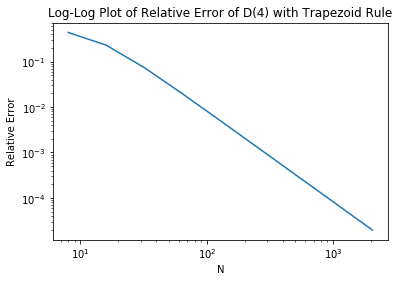

In [34]:
plt.loglog(N_list[1:-1], t_rel_e)
plt.title("Log-Log Plot of Relative Error of D(4) with Trapezoid Rule")
plt.xlabel("N")
plt.ylabel("Relative Error")
plt.savefig("q1_trap_rel_err.pdf")

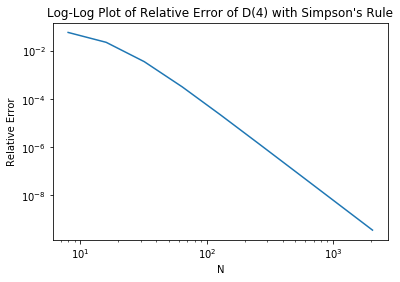

In [32]:
plt.clf()
plt.loglog(N_list[1:-1], s_rel_e)
plt.title("Log-Log Plot of Relative Error of D(4) with Simpson's Rule")
plt.xlabel("N")
plt.ylabel("Relative Error")
plt.savefig("q1_simp_rel_err.pdf")

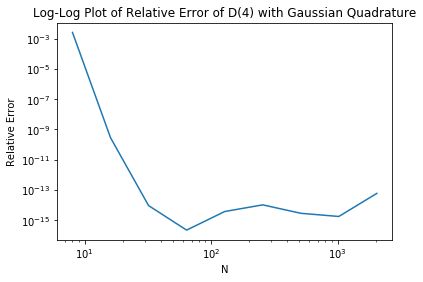

In [33]:
plt.clf()
plt.loglog(N_list[1:-1], q_rel_e)
plt.title("Log-Log Plot of Relative Error of D(4) with Gaussian Quadrature")
plt.xlabel("N")
plt.ylabel("Relative Error")
plt.savefig("q1_gauss_rel_err.pdf")

In [70]:
#PART (b)

#define the mean wind speed u_avg
def u_avg(T_a, t_h): #average hourly temperature, snow surface age t_h 
    return 11.2 + 0.365 * T_a + 0.00706 * T_a**2 + 0.9 * np.log(t_h) #units of m/s

#define standard deviation of wind speed
def delta(T_a): #average hourly temperature
    return 4.3 + 0.145 * T_a + 0.00196 * T_a**2 #unts of m/s

#define the integrand in equation (2) of lab instructions:
def f(u, u_a, sd): #wind speed, average wind speed, standard deviation of wind speed
    return(np.exp(-(u_a-u)**2/(2*sd**2)))

#define probability of blowing snow in Canadian Praries:
def P(u_10,T_a,t_h): #average hourly windspeed at height of 10m, average hourly temperature, snow surface age
    #first, calculate the integral:
    u, w = gsx.gaussxwab(100, 0, u_10) #get windspeed points, weights
    quad_I = 0.
    # loop over sample points to compute integral
    for k in range(100):
        quad_I += w[k]*f(u[k], u_avg(T_a, t_h), delta(T_a))
        
    quad_P = (1/(np.sqrt(2*np.pi) * delta(T_a))) * quad_I
    return quad_P

Text(0.5, 1.0, 'Probability of Blowing Snow in Canadian Praries')

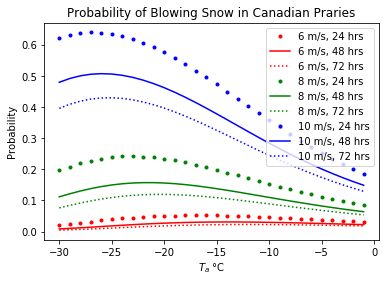

In [72]:
#Using plotting code from lab instructions:
from pylab import plot, show, clf, legend, title, xlabel, ylabel, savefig
clf()
u_10s = (6, 8, 10)
colours = ('r','g', 'b')
t_hs = (24, 48, 72)
lines = ('.','-',':')
T_a = np.arange(-30, 0, 1)
for (u_10, colour) in zip(u_10s, colours):
    for (t_h, line) in zip(t_hs, lines):
        plot_str = colour + line
        plot(T_a, P(u_10, T_a, t_h), plot_str, label=("{0} m/s, {1} hrs".format(u_10,t_h)))
legend()
xlabel(r"$T_a$ °C")
ylabel("Probability")
title("Probability of Blowing Snow in Canadian Praries")

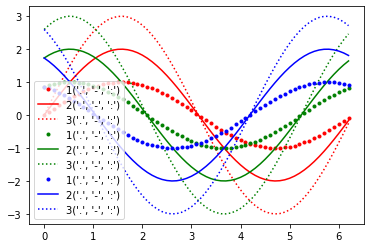

In [66]:
#Using plotting code from lab instructions:

from pylab import plot, show, clf, legend
clf()
phases = (0, np.pi/3, 2*np.pi/3)
colours = ('r','g', 'b')
amps = (1, 2, 3)
lines = ('.','-',':')
x = np.arange(0, 2*np.pi, 0.1)
for (phase, colour) in zip(phases, colours):
    for (amp, line) in zip(amps, lines):
        plot_str = colour + line
        plot(x, amp*np.sin(x+phase), plot_str, label=(str(amp) + str(lines)))
legend()
show()